In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker

import numpy as np
import pandas as pd
import seaborn as sns
import humanize
from http import HTTPStatus
# HTTP Status codes:
def http_label(status):
    # 451 is missing...
    if status == 451:
        return "Unavailable_for_Legal_Reasons (451)"
    if status == 520 or status == 523:
        return "Unepected (520)"
    return "%s (%s)" % (str(HTTPStatus(status)).split('.')[1].title(), status)

def filesize(size, pos):
    return humanize.naturalsize(np.exp(size))

# Validation set Images:

In [11]:
df = pd.read_csv('downloaded_validation_report.tsv.gz', compression='gzip', sep='\t', names=["url","folder","status","mimetype","size","file","headers"])
df.sample(10)

,url,folder,status,mimetype,size,file,headers
8747,http://cdn3.creativecirclemedia.com/rhodybeat/...,validation,200,image/jpeg,1427169.0,validation/1903725124,"{'Date': 'Wed, 23 Jan 2019 21:52:57 GMT', 'Ser..."
14853,http://l7.alamy.com/zooms/20aa0087d6b44b4a9960...,validation,200,image/jpeg,171046.0,validation/2799776854,"{'access-control-allow-origin': '*', 'cache-co..."
5785,https://static1.squarespace.com/static/542d78f...,validation,200,image/jpeg,91384.0,validation/2370121806,"{'X-ServedBy': 'cdn028', 'Timing-Allow-Origin'..."
208,https://i.pinimg.com/736x/fe/52/a3/fe52a3c3acd...,validation,200,image/jpeg,39820.0,validation/1144640680,"{'ETag': '""43a78f3b45a0ab3d185a31a90edf1672""',..."
946,http://l7.alamy.com/zooms/c7efd9213c354558bc94...,validation,200,image/jpeg,126338.0,validation/201175022,"{'access-control-allow-origin': '*', 'cache-co..."
6595,https://i.pinimg.com/736x/fb/11/15/fb1115a5019...,validation,200,image/jpeg,369681.0,validation/2516586865,"{'ETag': '""86a3b5d8d64dd93612e84c3a15bb499f""',..."
5589,http://i.dailymail.co.uk/i/pix/2012/08/09/arti...,validation,200,image/jpeg,149063.0,validation/1063005072,"{'Server': 'Apache', 'ETag': '""d498595befbe6a8..."
11799,https://triciaannemitchell.files.wordpress.com...,validation,200,image/jpeg,57199.0,validation/1393368654,"{'Server': 'nginx', 'Date': 'Wed, 23 Jan 2019 ..."
242,http://cdn3.theinertia.com/wp-content/gallery/...,validation,200,image/jpeg,92317.0,validation/2123666558,"{'Date': 'Wed, 23 Jan 2019 21:51:21 GMT', 'Con..."
739,https://i.pinimg.com/736x/66/53/e7/6653e792359...,validation,200,image/jpeg,90451.0,validation/715087014,"{'ETag': '""027718b5b6230eceff4bb299df84d783""',..."


In [12]:
pd.DataFrame(df.groupby('mimetype')['url'].count()).reset_index(level=0).sort_values(by='url', ascending=False)

,mimetype,url
1,image/jpeg,14736
4,text/html,51
2,image/png,6
0,image/gif,3
6,text/x-php,3
3,inode/x-empty,2
5,text/plain,1


,url
status,
Not_Found (404),329
Request_Timeout (408),289
Forbidden (403),257
Method_Not_Allowed (405),113
Service_Unavailable (503),16
Bad_Request (400),14
Internal_Server_Error (500),6
Gone (410),5
Unepected (520),4


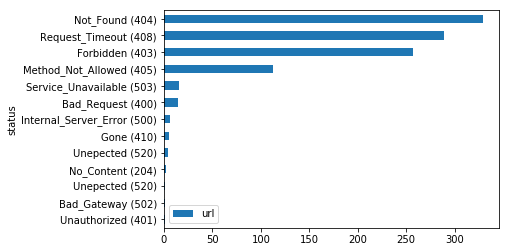

In [14]:
by_status = df[df['status']!=200][['status','url']]
by_status = by_status.groupby('status').count()
by_status = pd.DataFrame(by_status).reset_index(level=0)
by_status['status'] = by_status['status'].apply(lambda x: http_label(x))
by_status.set_index("status",drop=True,inplace=True)
by_status.sort_values(by='url').plot.barh()
by_status.sort_values(by='url',ascending=False)

14745 images


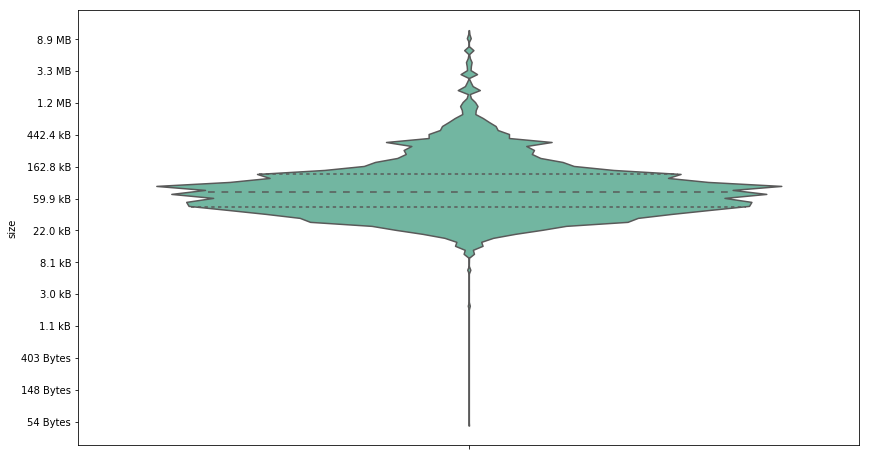

In [15]:
# File Sizes:
file_sizes = np.log(df[(df['size']> 0) & (df['mimetype'].str.contains('image'))]['size'].dropna())
print(len(file_sizes), 'images')

formatter = matplotlib.ticker.FuncFormatter(filesize)
plt.figure(figsize=(14,8))
ax = sns.violinplot(x=file_sizes, orient='v', inner='quartile', bw=0.01, palette='Set2')
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))
plt.show()

# Training set images

In [ ]:
df = pd.read_csv('downloaded_training_report.tsv.gz', compression='gzip', sep='\t', names=["url","folder","status","mimetype","size","file","headers"])
df.sample(10)

In [ ]:
pd.DataFrame(df.groupby('mimetype')['url'].count()).reset_index(level=0).sort_values(by='url', ascending=False)

In [ ]:
by_status = df[df['status']!=200][['status','url']]
by_status = by_status.groupby('status').count()
by_status = pd.DataFrame(by_status).reset_index(level=0)
by_status['status'] = by_status['status'].apply(lambda x: http_label(x))
by_status.set_index("status",drop=True,inplace=True)
by_status.sort_values(by='url').plot.barh()
by_status.sort_values(by='url',ascending=False)

In [ ]:
# File Sizes:
file_sizes = np.log(df[(df['size']> 0) & (df['mimetype'].str.contains('image'))]['size'].dropna())
print(len(file_sizes), 'images')

formatter = matplotlib.ticker.FuncFormatter(filesize)
plt.figure(figsize=(14,8))
ax = sns.violinplot(x=file_sizes, orient='v', inner='quartile', bw=0.01, palette='Set2')
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))
plt.show()